In [83]:
# Initial imports

import os
import requests
import pandas as pd
from pathlib import Path
import hvplot.pandas


In [84]:
# Reading the 30-year average mortgage rates
mtg_rates_30_yr_avg_df_prepandemic = pd.read_csv(Path("Interest_Rate_Resources/30_Yr_Avg_Mtg_Rate_3.1.17_thru_2.29.20.csv"), parse_dates=True, index_col='DATE', infer_datetime_format=True)
mtg_rates_30_yr_avg_df_pandemic = pd.read_csv(Path("Interest_Rate_Resources/30_Yr_Avg_Mtg_Rate_3.1.20_thru_2.28.23.csv"), parse_dates=True, index_col='DATE', infer_datetime_format=True)
mtg_rates_30_yr_avg_df_postpandemic = pd.read_csv(Path("Interest_Rate_Resources/30_Yr_Avg_Mtg_Rate_3.1.23_thru_7.6.23.csv"), parse_dates=True, index_col='DATE', infer_datetime_format=True)

# Display sample 
mtg_rates_30_yr_avg_df_postpandemic.head(10)

,MORTGAGE30US
DATE,
2023-03-02,6.65
2023-03-09,6.73
2023-03-16,6.60
2023-03-23,6.42
2023-03-30,6.32
2023-04-06,6.28
2023-04-13,6.27
2023-04-20,6.39
2023-04-27,6.43


In [85]:
#Rename the columns
mtg_rates_30_yr_avg_df_prepandemic.columns = ["30-Yr Mortg Interest Rate"]

mtg_rates_30_yr_avg_df_pandemic.columns = ["30-Yr Mortg Interest Rate"]

mtg_rates_30_yr_avg_df_postpandemic.columns = ["30-Yr Mortg Interest Rate"]
mtg_rates_30_yr_avg_df_postpandemic

,30-Yr Mortg Interest Rate
DATE,
2023-03-02,6.65
2023-03-09,6.73
2023-03-16,6.60
2023-03-23,6.42
2023-03-30,6.32
2023-04-06,6.28
2023-04-13,6.27
2023-04-20,6.39
2023-04-27,6.43


In [86]:
# Identify nulls and dropna's 
mtg_rates_30_yr_avg_df_prepandemic.isnull().sum()
mtg_rates_30_yr_avg_df_pandemic.isnull().sum()
mtg_rates_30_yr_avg_df_postpandemic.isnull().sum()

30-Yr Mortg Interest Rate    0
dtype: int64

In [87]:
# Grouping - Group by year and months and calculate the mean of each group
mthly_avg_rates_prepandemic = mtg_rates_30_yr_avg_df_prepandemic.groupby([mtg_rates_30_yr_avg_df_prepandemic.index.year, mtg_rates_30_yr_avg_df_prepandemic.index.month]).mean()
mthly_avg_rates_prepandemic

mthly_avg_rates_pandemic = mtg_rates_30_yr_avg_df_pandemic.groupby([mtg_rates_30_yr_avg_df_pandemic.index.year, mtg_rates_30_yr_avg_df_pandemic.index.month]).mean()
mthly_avg_rates_pandemic

mthly_avg_rates_postpandemic = mtg_rates_30_yr_avg_df_postpandemic.groupby([mtg_rates_30_yr_avg_df_postpandemic.index.year, mtg_rates_30_yr_avg_df_postpandemic.index.month]).mean()
mthly_avg_rates_postpandemic

30-Yr Mortg Interest Rate
DATE DATE                           
2023 3                        6.5440
     4                        6.3425
     5                        6.4250
     6                        6.7140
     7                        6.8100

<Axes: title={'center': 'Average 30-Year Mortgage Rates by Month: March 2017 - February 2020'}, xlabel='DATE,DATE'>

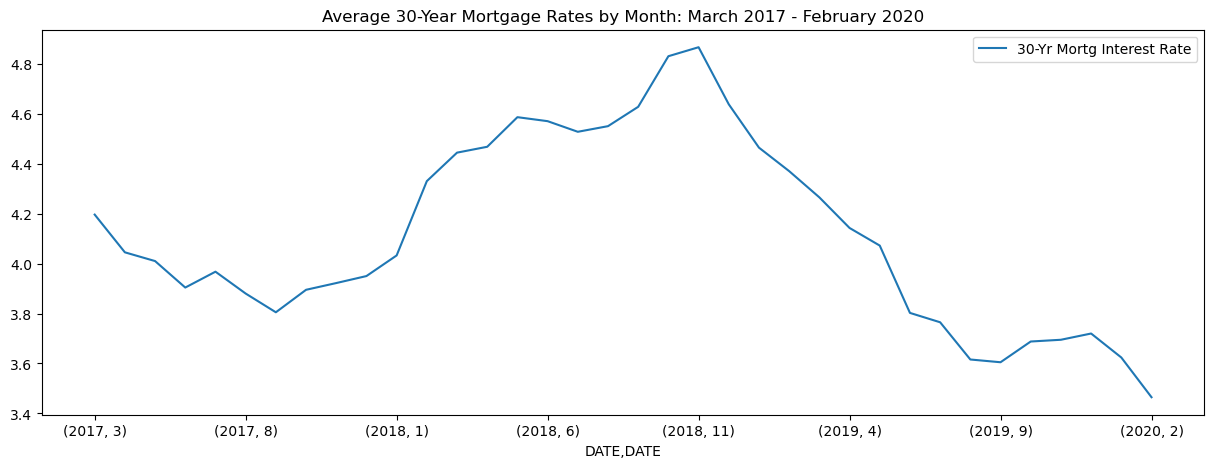

In [88]:
# Plot Graph 
mthly_avg_rates_prepandemic.plot(kind="line", title="Average 30-Year Mortgage Rates by Month: March 2017 - February 2020", figsize=(15,5))


<Axes: title={'center': 'Average 30-Year Mortgage Rates by Month: March 2020 - February 2023'}, xlabel='DATE,DATE'>

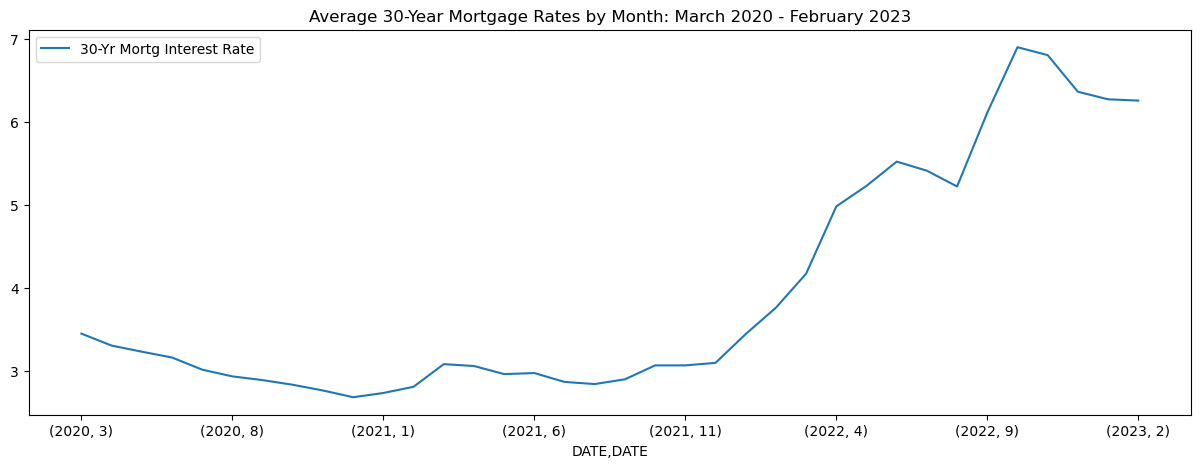

In [89]:
# Plot Graph Rates During Pandemic Era
mthly_avg_rates_pandemic.plot(kind="line", title="Average 30-Year Mortgage Rates by Month: March 2020 - February 2023", figsize=(15,5))

<Axes: title={'center': 'Average 30-Year Mortgage Rates by Month: March 2023 - July 2023'}, xlabel='DATE,DATE'>

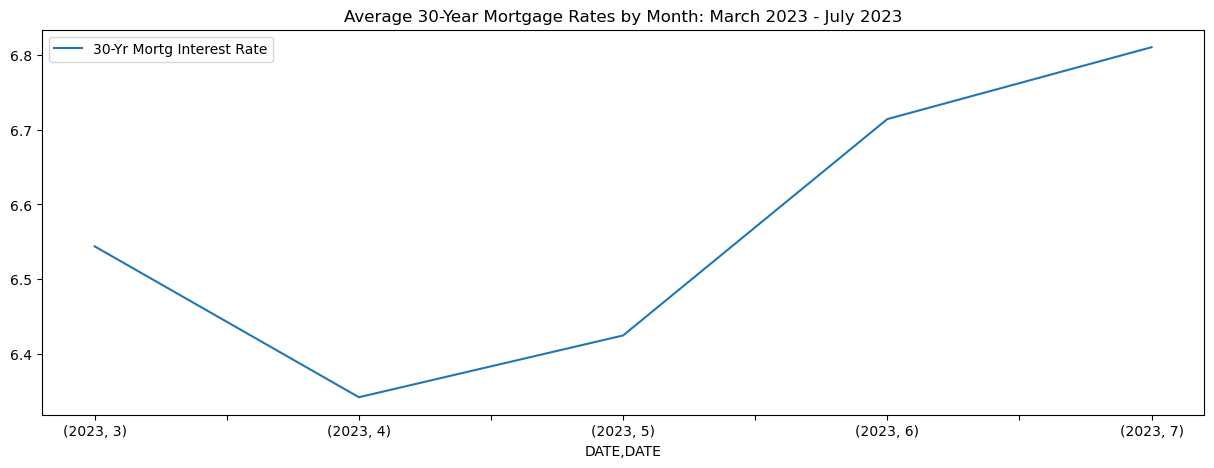

In [90]:
# Plot Graph Rates During Pandemic Era
mthly_avg_rates_postpandemic.plot(kind="line", title="Average 30-Year Mortgage Rates by Month: March 2023 - July 2023", figsize=(15,5))


In [91]:
# Concat the interest rates over the entire 2017 to 2023 timeframe 
combined_rate_df = pd.concat([mtg_rates_30_yr_avg_df_prepandemic, mtg_rates_30_yr_avg_df_pandemic, mtg_rates_30_yr_avg_df_postpandemic], axis="rows", join="inner")
combined_rate_df

,30-Yr Mortg Interest Rate
DATE,
2017-03-02,4.10
2017-03-09,4.21
2017-03-16,4.30
2017-03-23,4.23
2017-03-30,4.14
...,...
2023-06-08,6.71
2023-06-15,6.69
2023-06-22,6.67


In [92]:
#Plot the graph
combined_rate_df.hvplot(xlabel="DATE", ylabel="30-Yr Mortg Interest Rate", title="30-Year Mortgage Rates by Month: March 2017 - July 2023")

:Curve   [DATE]   (30-Yr Mortg Interest Rate)

In [93]:
#combined_rate_grouby
combined_rate_df_groupby = combined_rate_df.groupby([combined_rate_df.index.year, combined_rate_df.index.month]).mean()
combined_rate_df_groupby

30-Yr Mortg Interest Rate
DATE DATE                           
2017 3                        4.1960
     4                        4.0450
     5                        4.0100
     6                        3.9040
     7                        3.9675
...                              ...
2023 3                        6.5440
     4                        6.3425
     5                        6.4250
     6                        6.7140
     7                        6.8100

[77 rows x 1 columns]

In [95]:
# Describe the stats for prepandemic

std_prepandemic = mtg_rates_30_yr_avg_df_prepandemic.describe()
std_prepandemic



,30-Yr Mortg Interest Rate
count,157.000000
mean,4.122038
std,0.384697
min,3.450000
25%,3.820000
50%,4.040000
75%,4.460000
max,4.940000


In [96]:
# Describe the stats for pandemic
std_pandemic = mtg_rates_30_yr_avg_df_pandemic.describe()
std_pandemic


,30-Yr Mortg Interest Rate
count,156.000000
mean,3.940705
std,1.385990
min,2.650000
25%,2.930000
50%,3.135000
75%,5.152500
max,7.080000


In [97]:
# Describe the stats for post pandemic
std_postpandemic = mtg_rates_30_yr_avg_df_postpandemic.describe()
std_postpandemic

,30-Yr Mortg Interest Rate
count,19.000000
mean,6.535263
std,0.183163
min,6.270000
25%,6.390000
50%,6.570000
75%,6.700000
max,6.810000


In [108]:
# Read the Feds Fund Rate
fed_funds_rate_df_prepandemic = pd.read_csv(Path("Interest_Rate_Resources/Fed_Funds_Rate_3.1.17_thru_3.1.20.csv")
, parse_dates=True, index_col='DATE', infer_datetime_format=True)
fed_funds_rate_df_pandemic = pd.read_csv(Path("Interest_Rate_Resources/Fed_Funds_Rate_3.1.20_thru_3.1.23.csv"), parse_dates=True, index_col='DATE', infer_datetime_format=True)
fed_funds_rate_df_postpandemic = pd.read_csv(Path("Interest_Rate_Resources/Fed_Funds_Rate_3.1.23_thru_6.1.23.csv"), parse_dates=True, index_col='DATE', infer_datetime_format=True)

# Describe the stats prepandmic
fed_funds_rate_df_prepandemic.describe()


,FEDFUNDS
count,37.000000
mean,1.685676
std,0.534439
min,0.650000
25%,1.160000
50%,1.690000
75%,2.190000
max,2.420000


In [106]:
# Describe the stats during the pandemic
fed_funds_rate_df_pandemic.describe()


,FEDFUNDS
count,37.000000
mean,0.975405
std,1.529567
min,0.050000
25%,0.080000
50%,0.090000
75%,1.210000
max,4.650000


In [107]:
# Describe the stats post pandemic
fed_funds_rate_df_postpandemic.describe()

,FEDFUNDS
count,4.000000
mean,4.905000
std,0.204369
min,4.650000
25%,4.785000
50%,4.945000
75%,5.065000
max,5.080000


In [100]:
# concat the the fed funds rates

combined_fed_rate_df = pd.concat([fed_funds_rate_df_prepandemic, fed_funds_rate_df_pandemic, fed_funds_rate_df_postpandemic], axis="rows", join="inner")
combined_fed_rate_df.head(10)

,FEDFUNDS
DATE,
2017-03-01,0.79
2017-04-01,0.90
2017-05-01,0.91
2017-06-01,1.04
2017-07-01,1.15
2017-08-01,1.16
2017-09-01,1.15
2017-10-01,1.15
2017-11-01,1.16


In [101]:
# plot the graph
combined_fed_rate_df.hvplot(xlabel="DATE", ylabel="Fed Funds Rate", title="Fed Funds Rate by Month: March 2017 - July 2023")



:Curve   [DATE]   (FEDFUNDS)

In [103]:
#Overlay the graphs
combined_fed_rate_df.hvplot(label="Fed Funds Rate") * combined_rate_df.hvplot(label="30-Year Average Mtg Rates")


:Overlay
   .Curve.Fed_Funds_Rate                           :Curve   [DATE]   (FEDFUNDS)
   .Curve.A_30_hyphen_minus_Year_Average_Mtg_Rates :Curve   [DATE]   (30-Yr Mortg Interest Rate)